In [1]:
import sklearn as sk
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sb

from pylab import rcParams

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib inline
rcParams["figure.figsize"] = 20,20
sb.set_style('whitegrid')

In [3]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
concat = dataset.rename(index=str, columns={"id": 'DROPPED', "Unnamed: 32": 'DROPPED', "diagnosis": 'BINARY ENCODED'}).columns.values

In [44]:
DataDictionary = pd.DataFrame(dataset.columns.values)
DataDictionary = pd.concat([DataDictionary,pd.DataFrame(dataset.dtypes.values),pd.DataFrame(concat)],axis=1)
DataDictionary.head()

,0,0,0
0,id,int64,DROPPED
1,diagnosis,object,BINARY ENCODED
2,radius_mean,float64,radius_mean
3,texture_mean,float64,texture_mean
4,perimeter_mean,float64,perimeter_mean


In [ ]:
df = dataset.drop(['id','Unnamed: 32'], axis=1)

Removed any columns that are not relevant to the analysis. In this case there is an ID that is not statistically relevant to and a Unnamed column that holds no data. Everything else could potentially be relvant to the prediction at this point.

In [4]:
df.count()

diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

The prediction that the model will target is the diagnosis column. This is a binary classification problem where the two possible outcomes are that the suspect tissue is either benign or malignant. This will need to be encoded(1 and 0 respectively) as the current datatype is a string and will not work as an input argument for the classification algorithm. More exploration of the structure of the dataset is needed. The next task is looking and whether the dataset is imbalanced.

0.37 % Positive within this dataset.


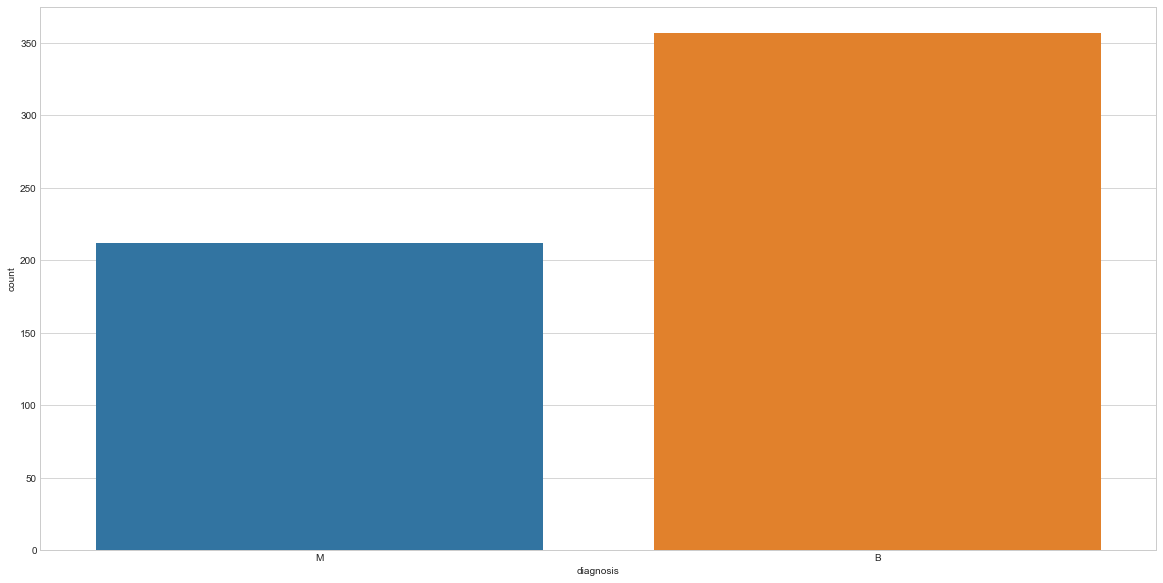

In [5]:
plt.figure(figsize=(20,10))
sb.countplot(x='diagnosis', data=df)

maligantRate = df['diagnosis'][df['diagnosis'] == 'M'].count() / df['diagnosis'].count()
print(maligantRate.round(2), '% Positive within this dataset.')

About a third of the data is classed as Malignant. The rest is Benign. This data set is imbalanced so I might need to look at how this affects the performance metrics.

In [6]:
encoder = preprocessing.LabelEncoder()
df.diagnosis = encoder.fit_transform(df.diagnosis)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df_minor = df[df['diagnosis']==1]
df_major = df[df['diagnosis']==0]

In [8]:
from sklearn.utils import resample

upsampled_minority = resample(df_minor, replace=True, n_samples=357, random_state=7)

df_upsampled = pd.concat([df_major,upsampled_minority])
df_upsampled.count()

diagnosis                  714
radius_mean                714
texture_mean               714
perimeter_mean             714
area_mean                  714
smoothness_mean            714
compactness_mean           714
concavity_mean             714
concave points_mean        714
symmetry_mean              714
fractal_dimension_mean     714
radius_se                  714
texture_se                 714
perimeter_se               714
area_se                    714
smoothness_se              714
compactness_se             714
concavity_se               714
concave points_se          714
symmetry_se                714
fractal_dimension_se       714
radius_worst               714
texture_worst              714
perimeter_worst            714
area_worst                 714
smoothness_worst           714
compactness_worst          714
concavity_worst            714
concave points_worst       714
symmetry_worst             714
fractal_dimension_worst    714
dtype: int64

0.5 % Positive within this dataset.


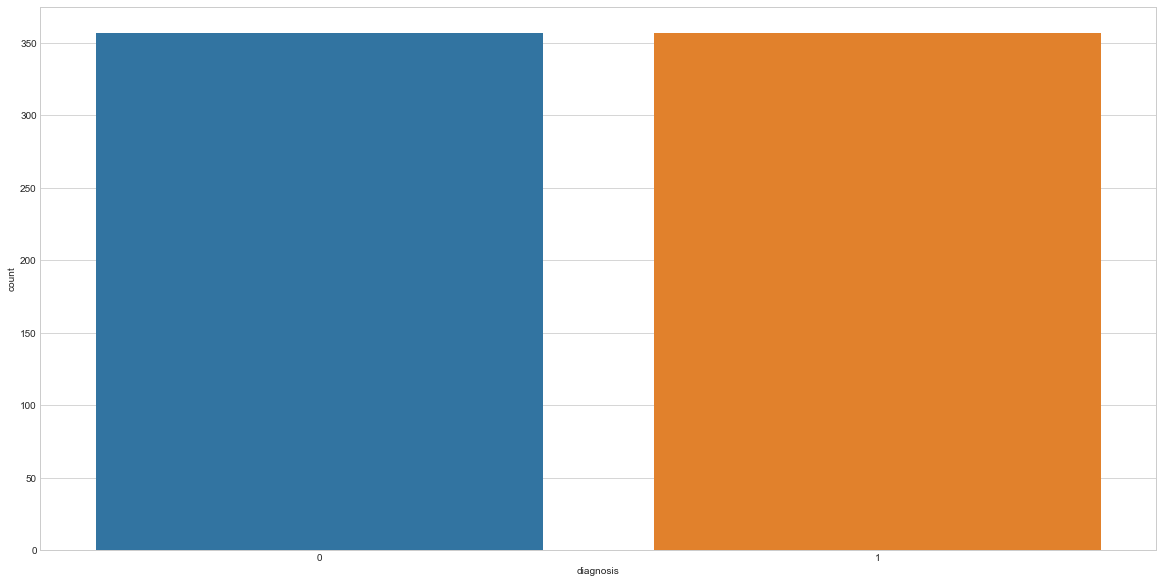

In [9]:
df = df_upsampled
plt.figure(figsize=(20,10))
sb.countplot(x='diagnosis', data=df)

maligantRate = df['diagnosis'][df['diagnosis'] == 1].count() / df['diagnosis'].count()
print(maligantRate.round(2), '% Positive within this dataset.')

Now that the data is clean and balanced, it is time to look at feature engineering. The goal is to produce suitable inputs for the learning algorithm by looking at what features are the most useful when trying to classify the datapoints. The first task will explore how the two classes features are distributed to see if there may be any distinctive seperations can be made.

The dataframe contains 30 feature columns, to compare them the dataframe is split into "malignant" and "benign". Looping through each feature and plotting a comparison between each class for the same feature on subplotted histograms superimposed over on another.

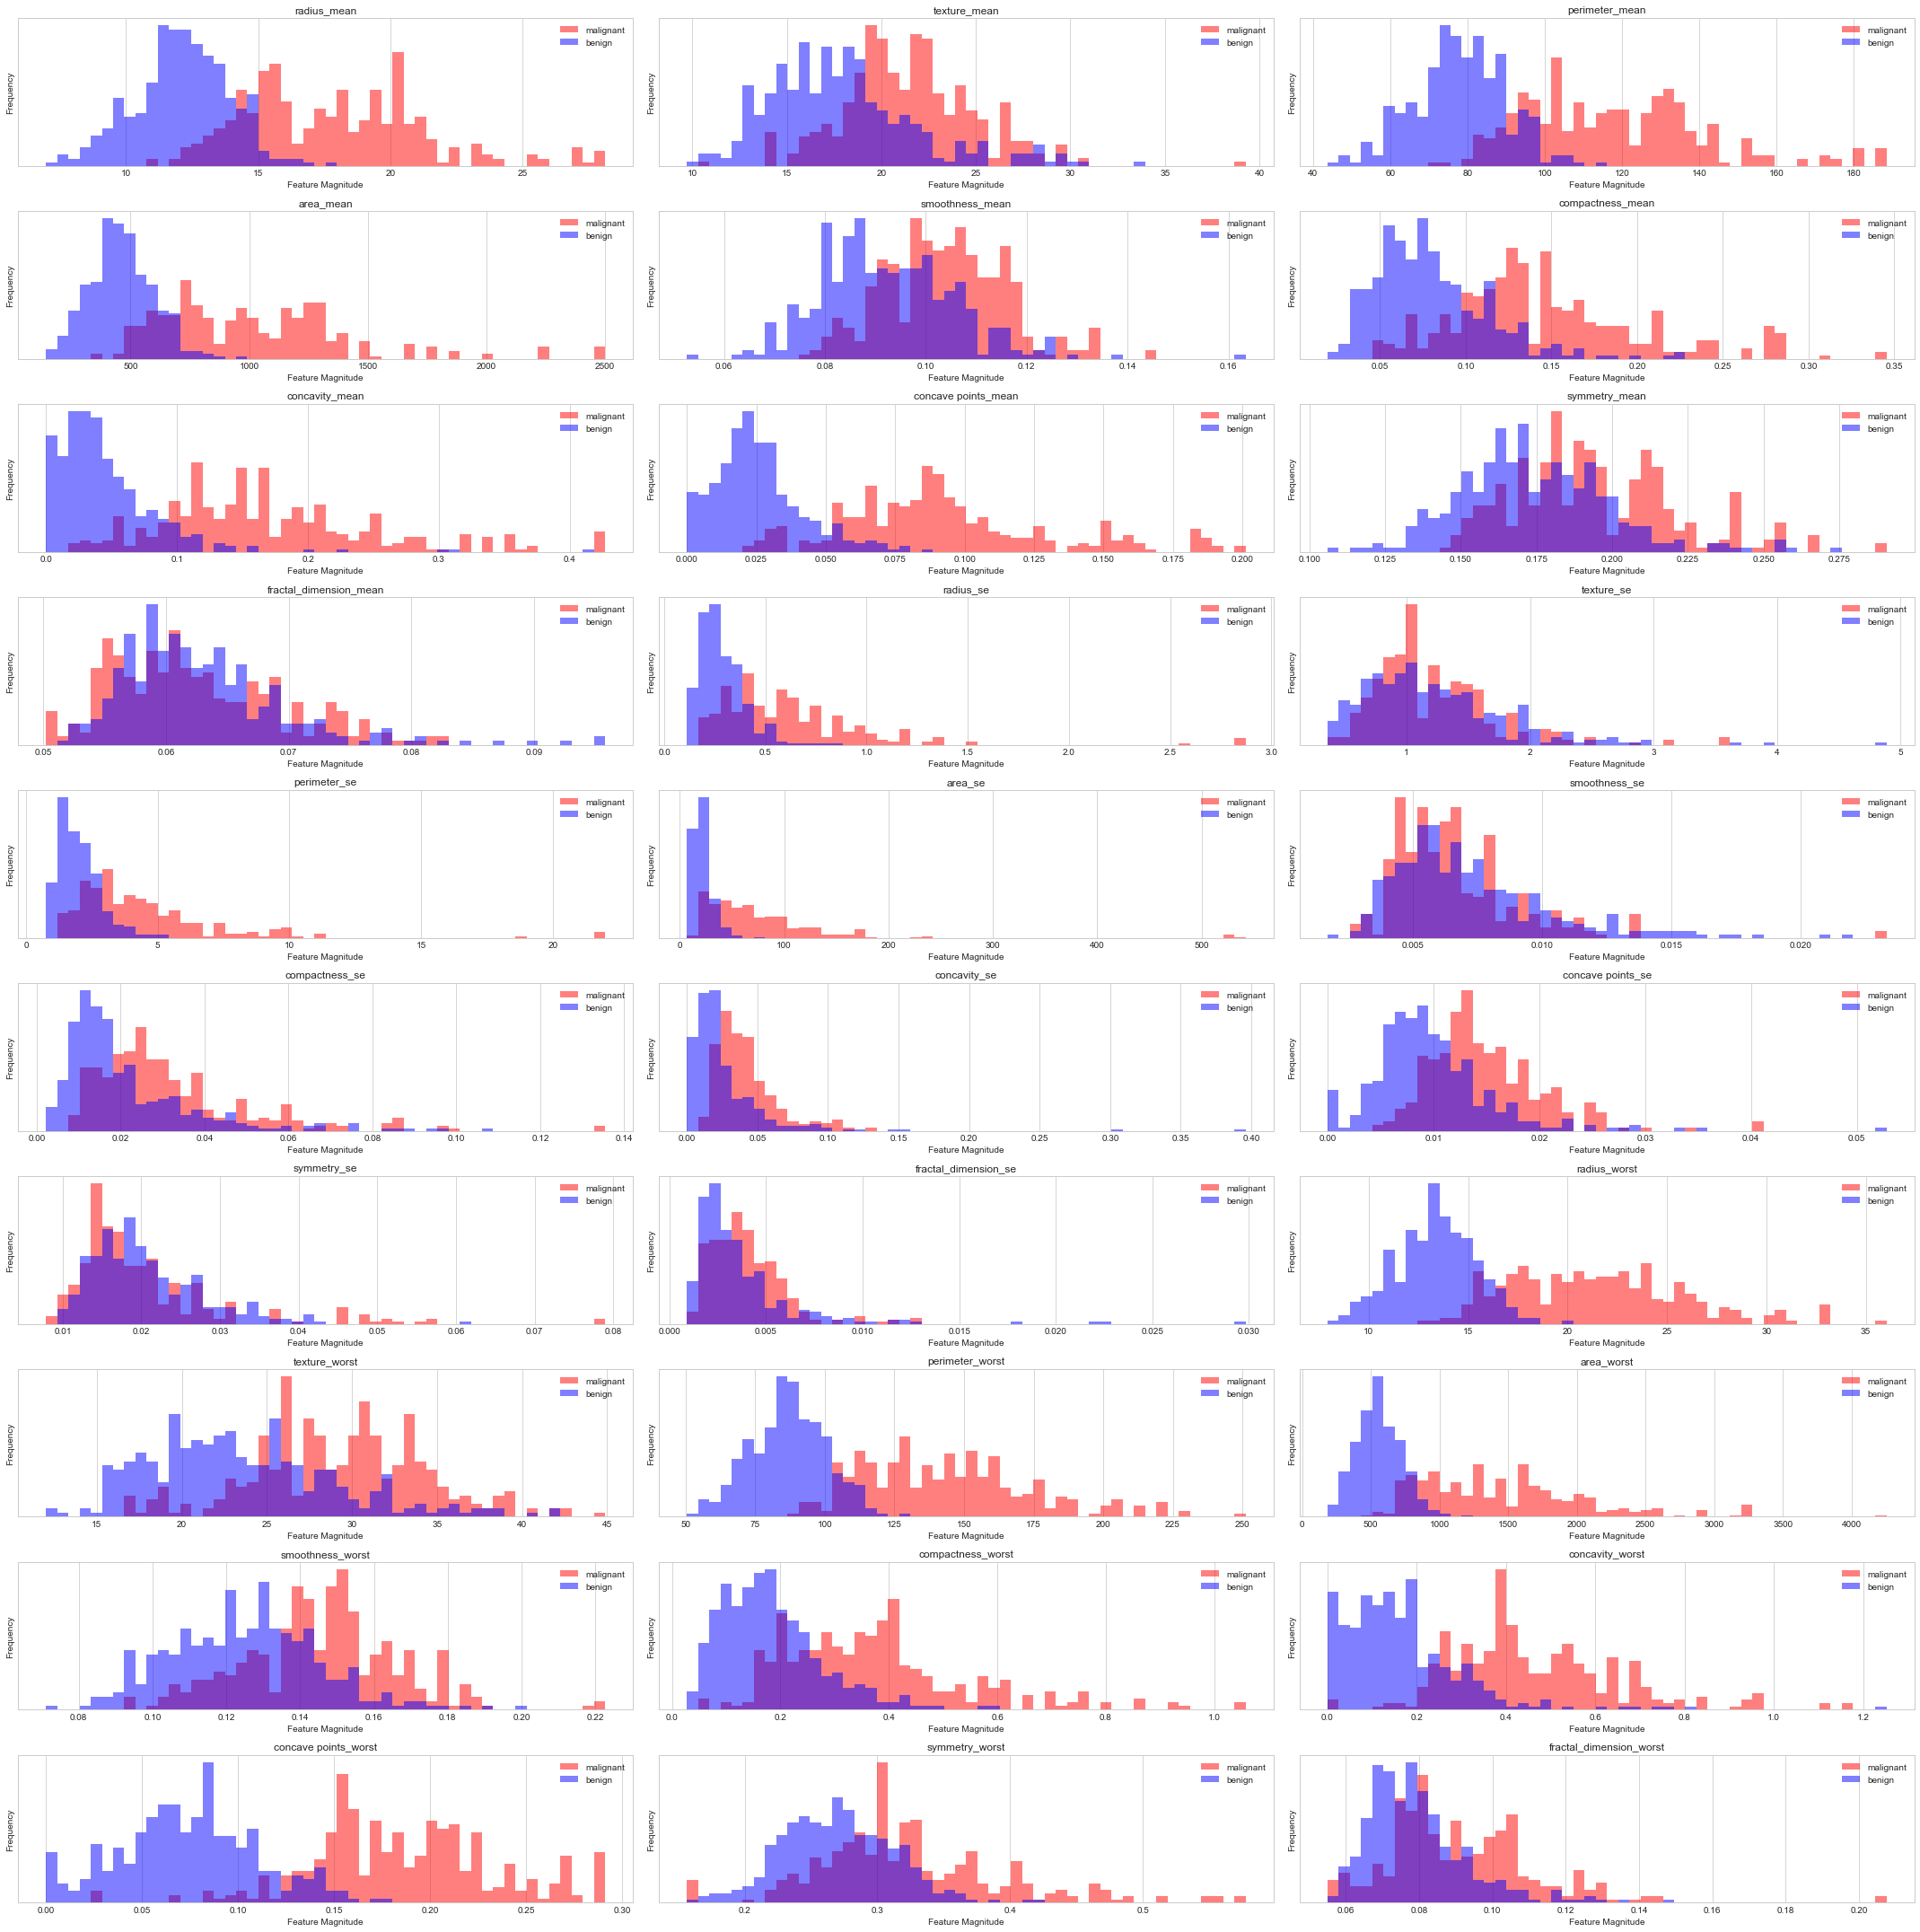

In [10]:
malignant = df[df['diagnosis'] == 1]
benign = df[df['diagnosis'] == 0]

fig, axes = plt.subplots(10, 3, figsize=(30,30))
ax = axes.ravel()


for i in range(30):
    l=i+1
    _, bins = np.histogram(df.iloc[:, l], bins=50)
    ax[i].hist(malignant.iloc[:, l], color='red', bins=bins, alpha=.5)
    ax[i].hist(benign.iloc[:, l], color='blue', bins=bins, alpha=.5)
    ax[i].set_title(df.columns[l])
    ax[i].set_yticks(())
    
    ax[i].set_xlabel("Feature Magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["malignant", "benign"], loc="best")

fig.tight_layout()

This has revealed some potential features that might be used to classify the risk. For example, concave worst_points has a nice seperation in magnitude between classes, and radius_worst has as an even more distinct seperation in magnitude. Next, further validation that there actually is a distictive difference between malignant and benign features will be done using pricible component analysis(PCA) visualized. This also might give a good indication of the type of model algorithm could be used to classify the features and we can look at if there are any relations between the features.

Text(0.5,0,'Number of components')

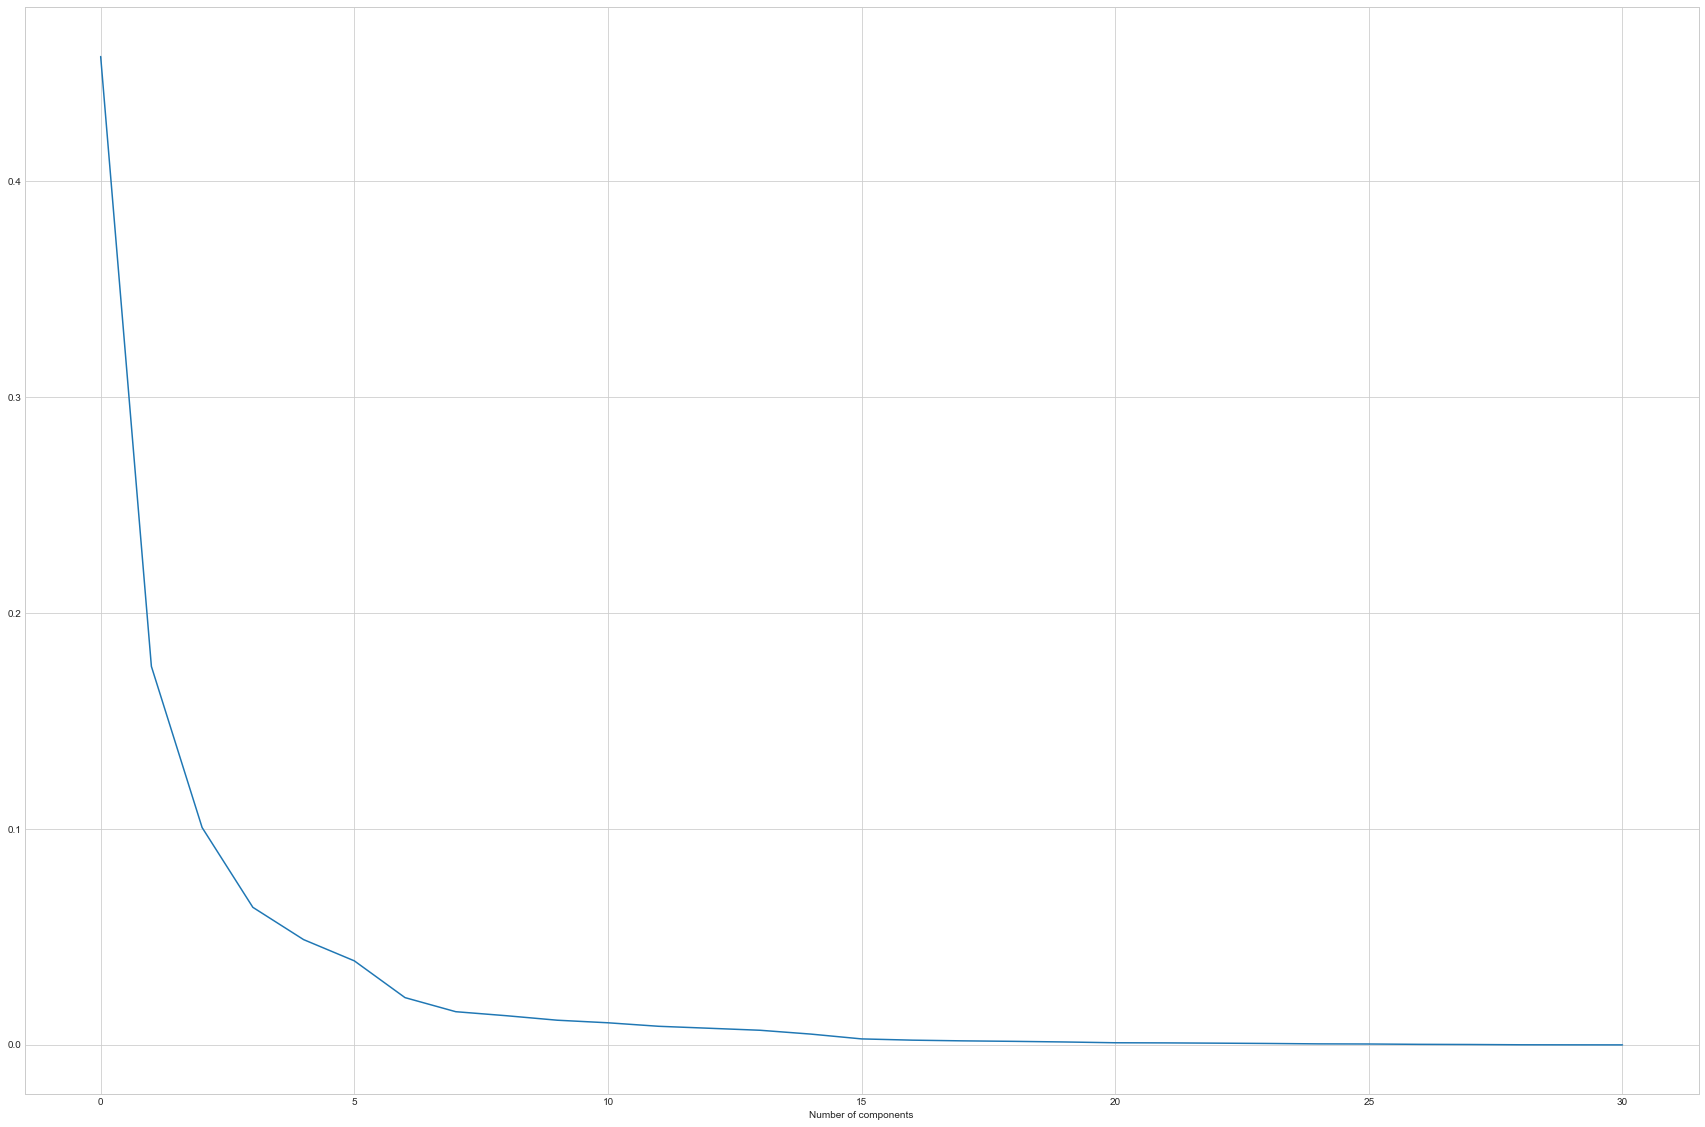

In [11]:
scaler = preprocessing.StandardScaler()
pca = df
scaler.fit(pca)

xScaled = scaler.transform(pca)

pca = PCA()
pca.fit(xScaled)
xPCA = pca.transform(xScaled)

plt.figure(figsize=(30,20))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Number of components")

This scree plot shows that about 3 components hold over .1 of varience the others are just noise. We should only select those and discard of the rest.

In [12]:
pca = PCA(n_components=3)
pca.fit(xScaled)
xPCA = pca.transform(xScaled)
print("Residual infomation left after compression: {}" . format(pca.explained_variance_ratio_.sum()))

Residual infomation left after compression: 0.7335551647302555


Rule of thumb is to keep over 70 percent of the infomation.

In [13]:
print("Original: {}". format(str(xScaled.shape)))
print("Major Components: {}". format(str(xPCA.shape)))

Original: (714, 31)
Major Components: (714, 3)


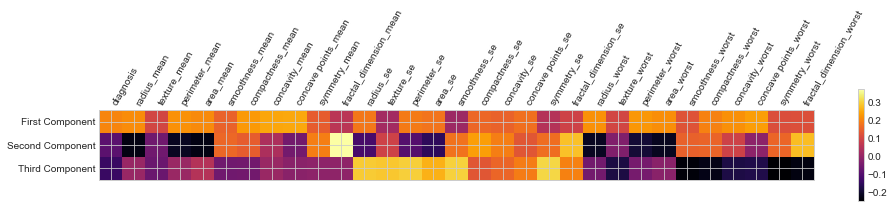

In [14]:
columnRange = range(len(list(df)))

plt.figure(figsize=(20,20))
plt.matshow(pca.components_, cmap='inferno')
plt.yticks([0,1,2], ['First Component', 'Second Component', 'Third Component'])
plt.xticks(columnRange, df.columns.values, rotation=60, ha="left")
    
plt.colorbar()

The first component shows a general correlation between a high majority of features which means that multiple features might be relevant to making class distinctions. If a good predictive feature is high the others is likley to follow and vice versa. This means that we risk multicoliniarity and reducing the features is a must. The histogram earlier will help in making better feature choices as it shows where the best distinction are. The issue now is the follow ocams razor and reduce the amount of features to is fundamental predictors. To further explore this, I will plot a uncompressed detailed corralation matrix heatmap.

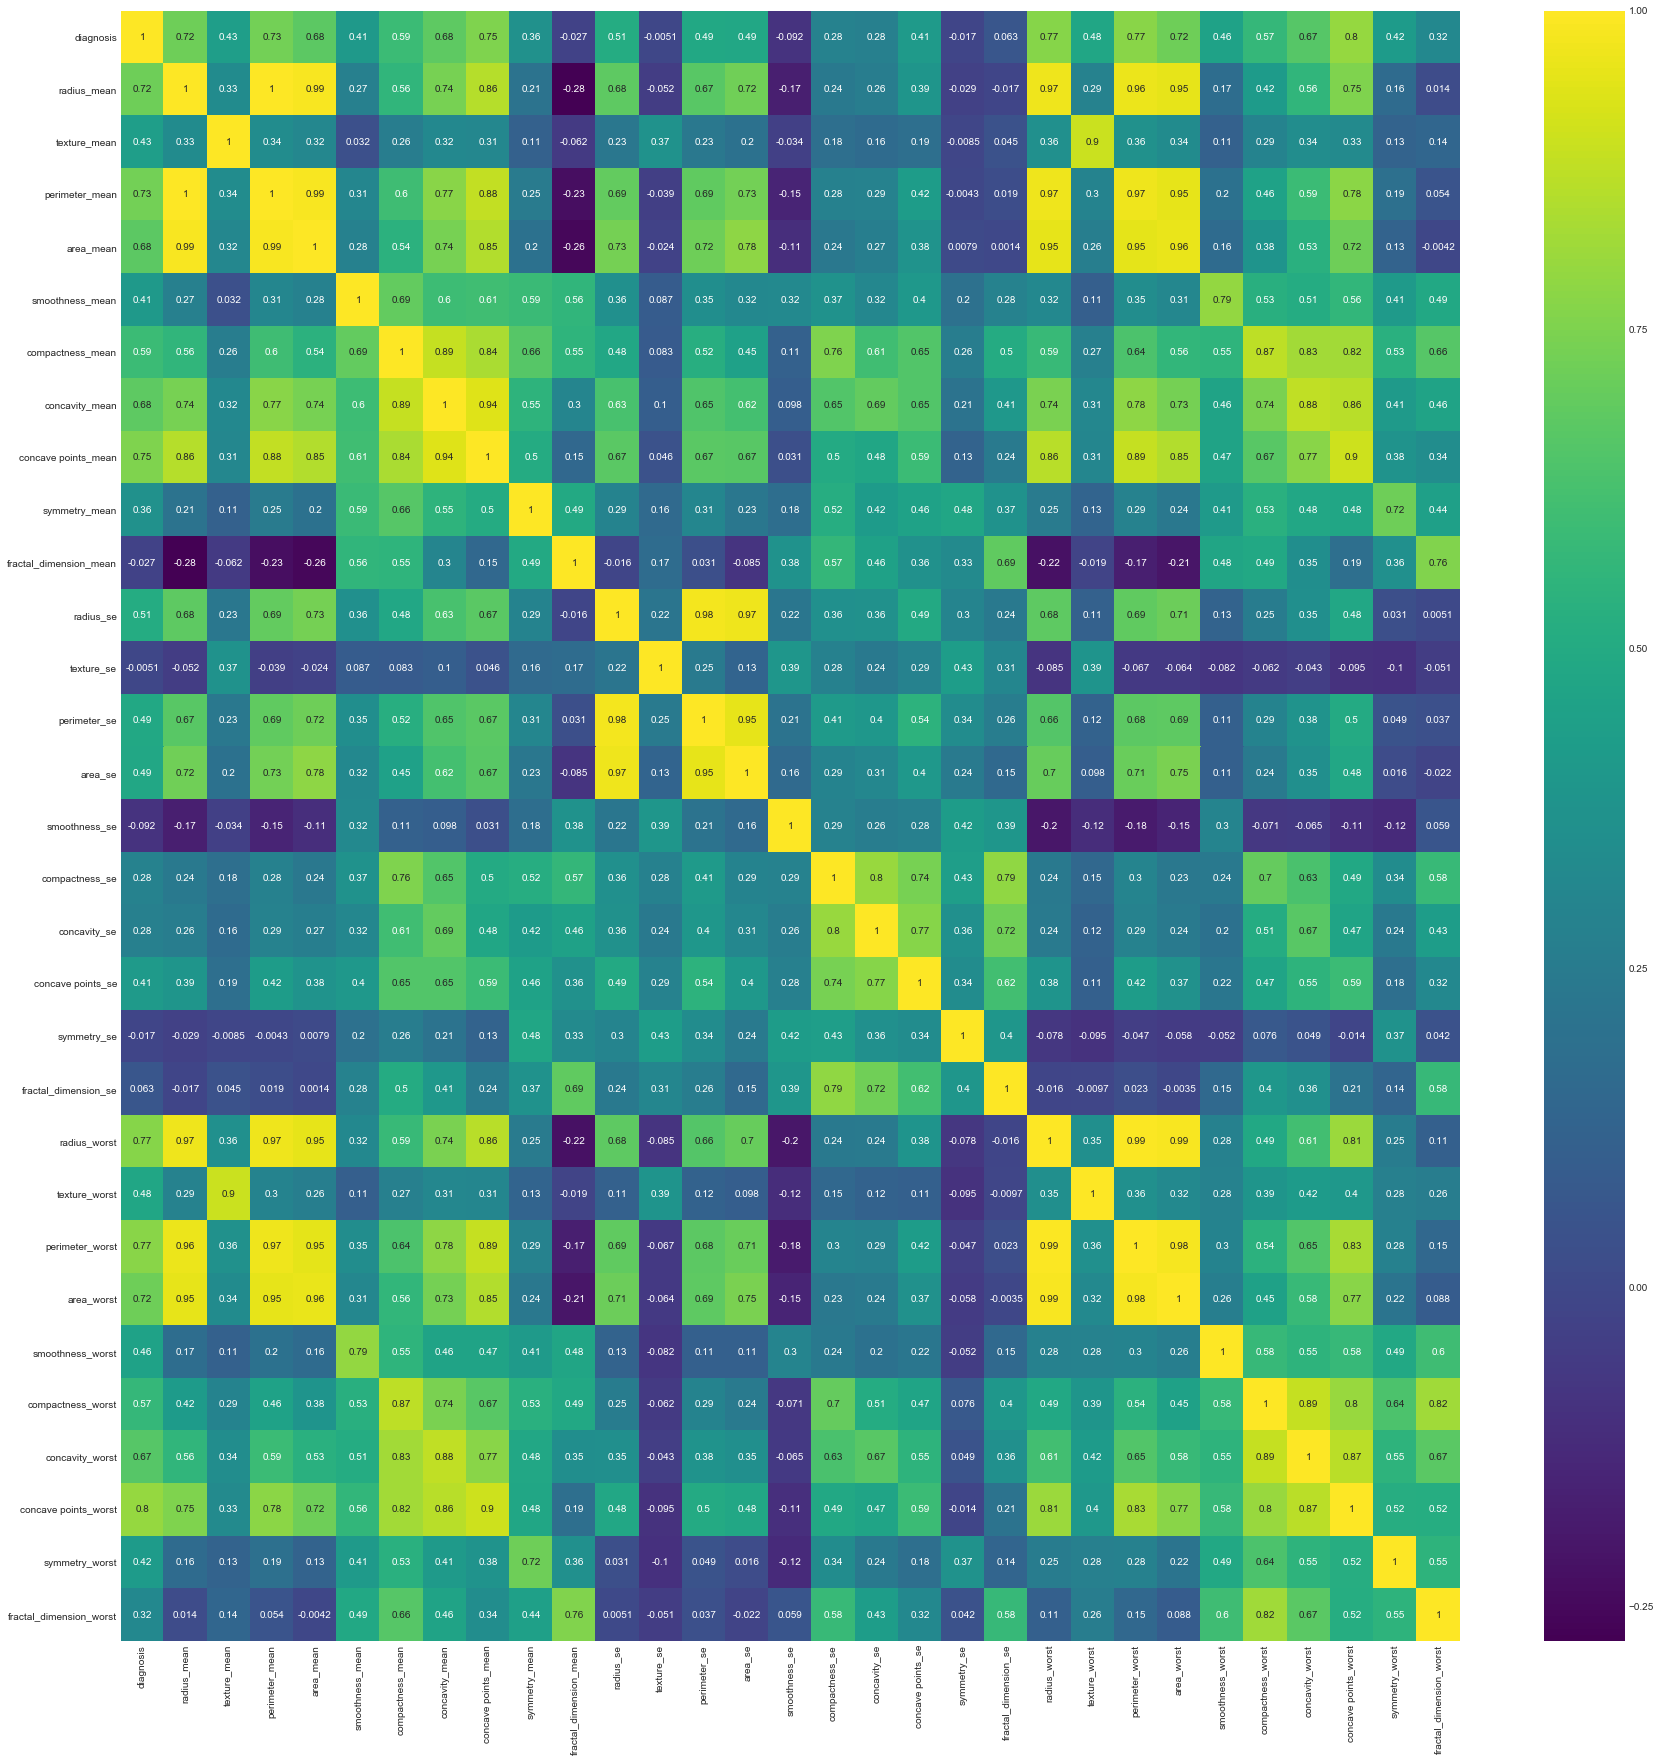

In [15]:
corr = scaler.fit(df)
corr = scaler.transform(df)
corr = pd.DataFrame(df)
columns = df.drop(['diagnosis'], axis=1).columns.values
plt.figure(figsize=(30,30))
sb.heatmap(corr.corr(), annot=True, cmap='viridis')

The variants of radius, texture and area have a strong correlation to each other. If one of them is high, the other is likley to be high aswell. Looking at the names of these features gives an idea as to why these have a high corralation. Removing some of these will speed up the the processing. Random Forest algorithm may be affected by highly related features.

# Cluster Analysis 

## Side View

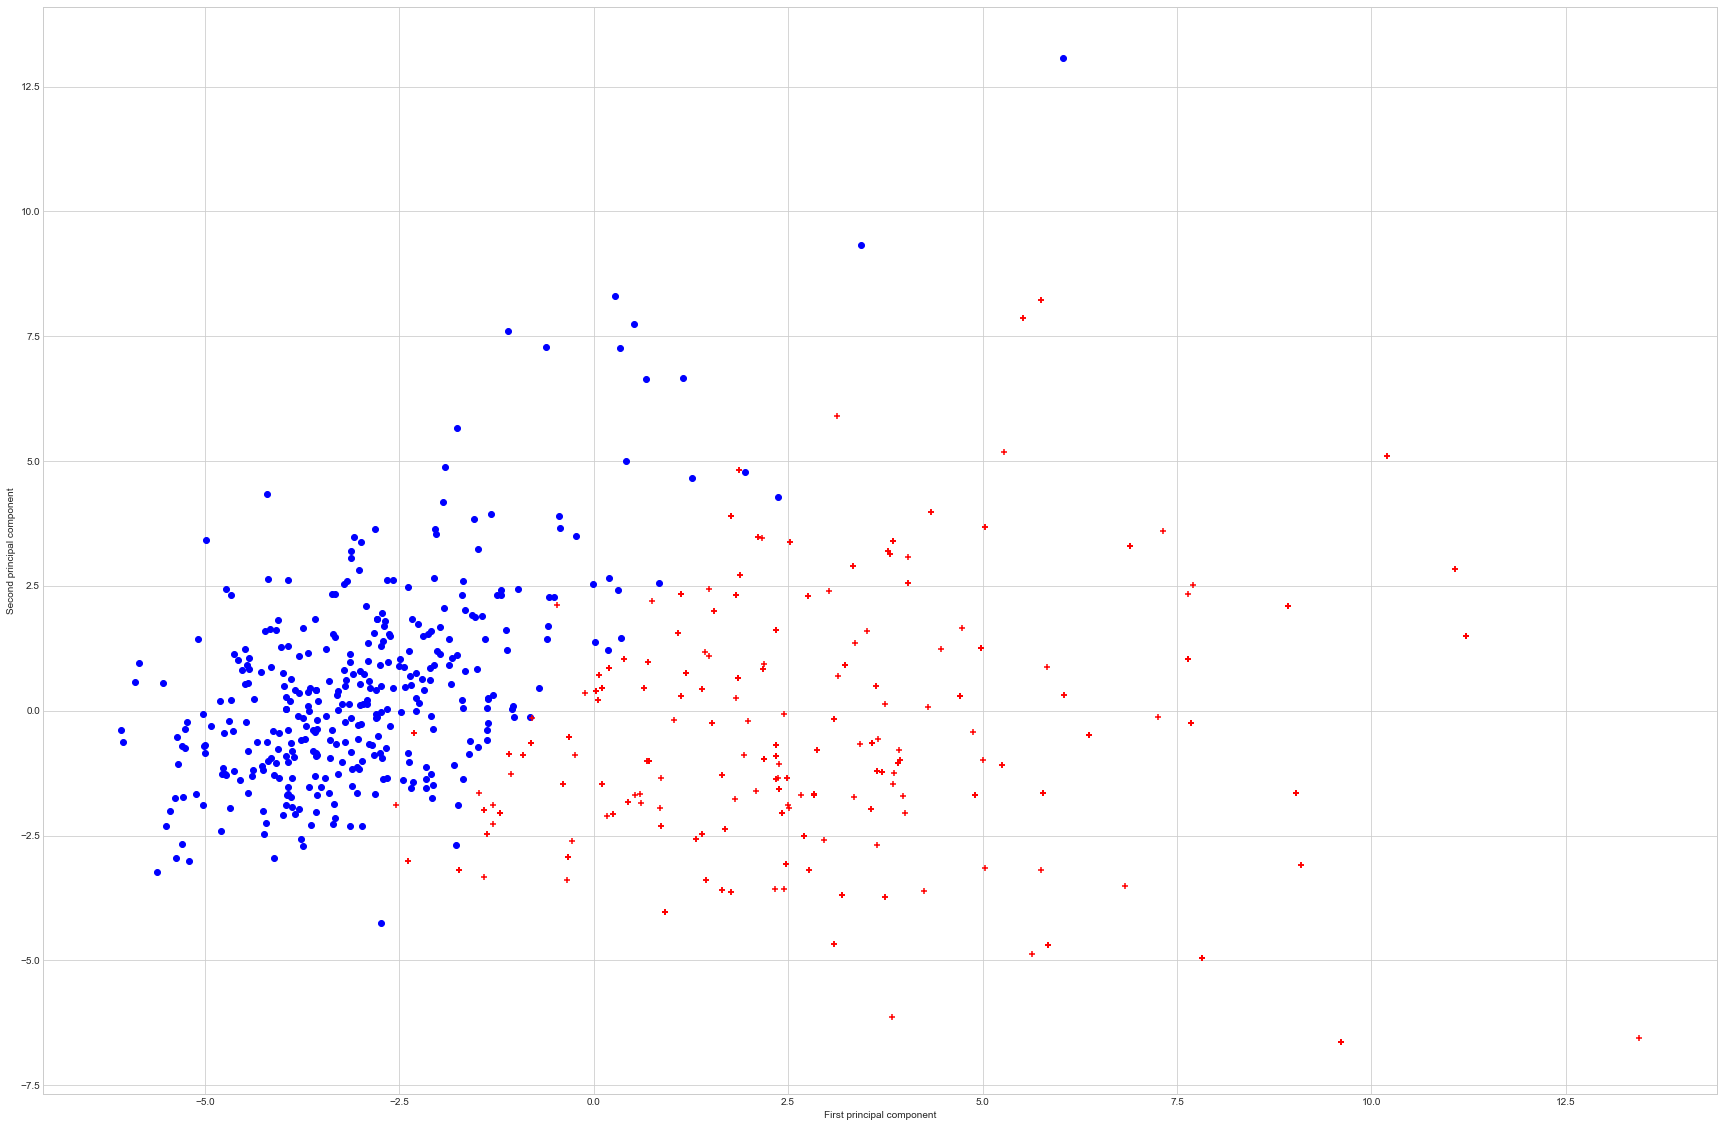

In [16]:
plt.figure(figsize=(30,20))
r = df.shape[0]

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

for i in range(r):
    
    if df.iloc[i][0]:
        marker = '+'
        color='red'
        label='Malignant'
    else:
        marker = 'o'
        color='blue'
        label='Benign'
    
    plt.scatter(xPCA[i,0],xPCA[i,1], marker=marker , color=color, label=label)

# Top View

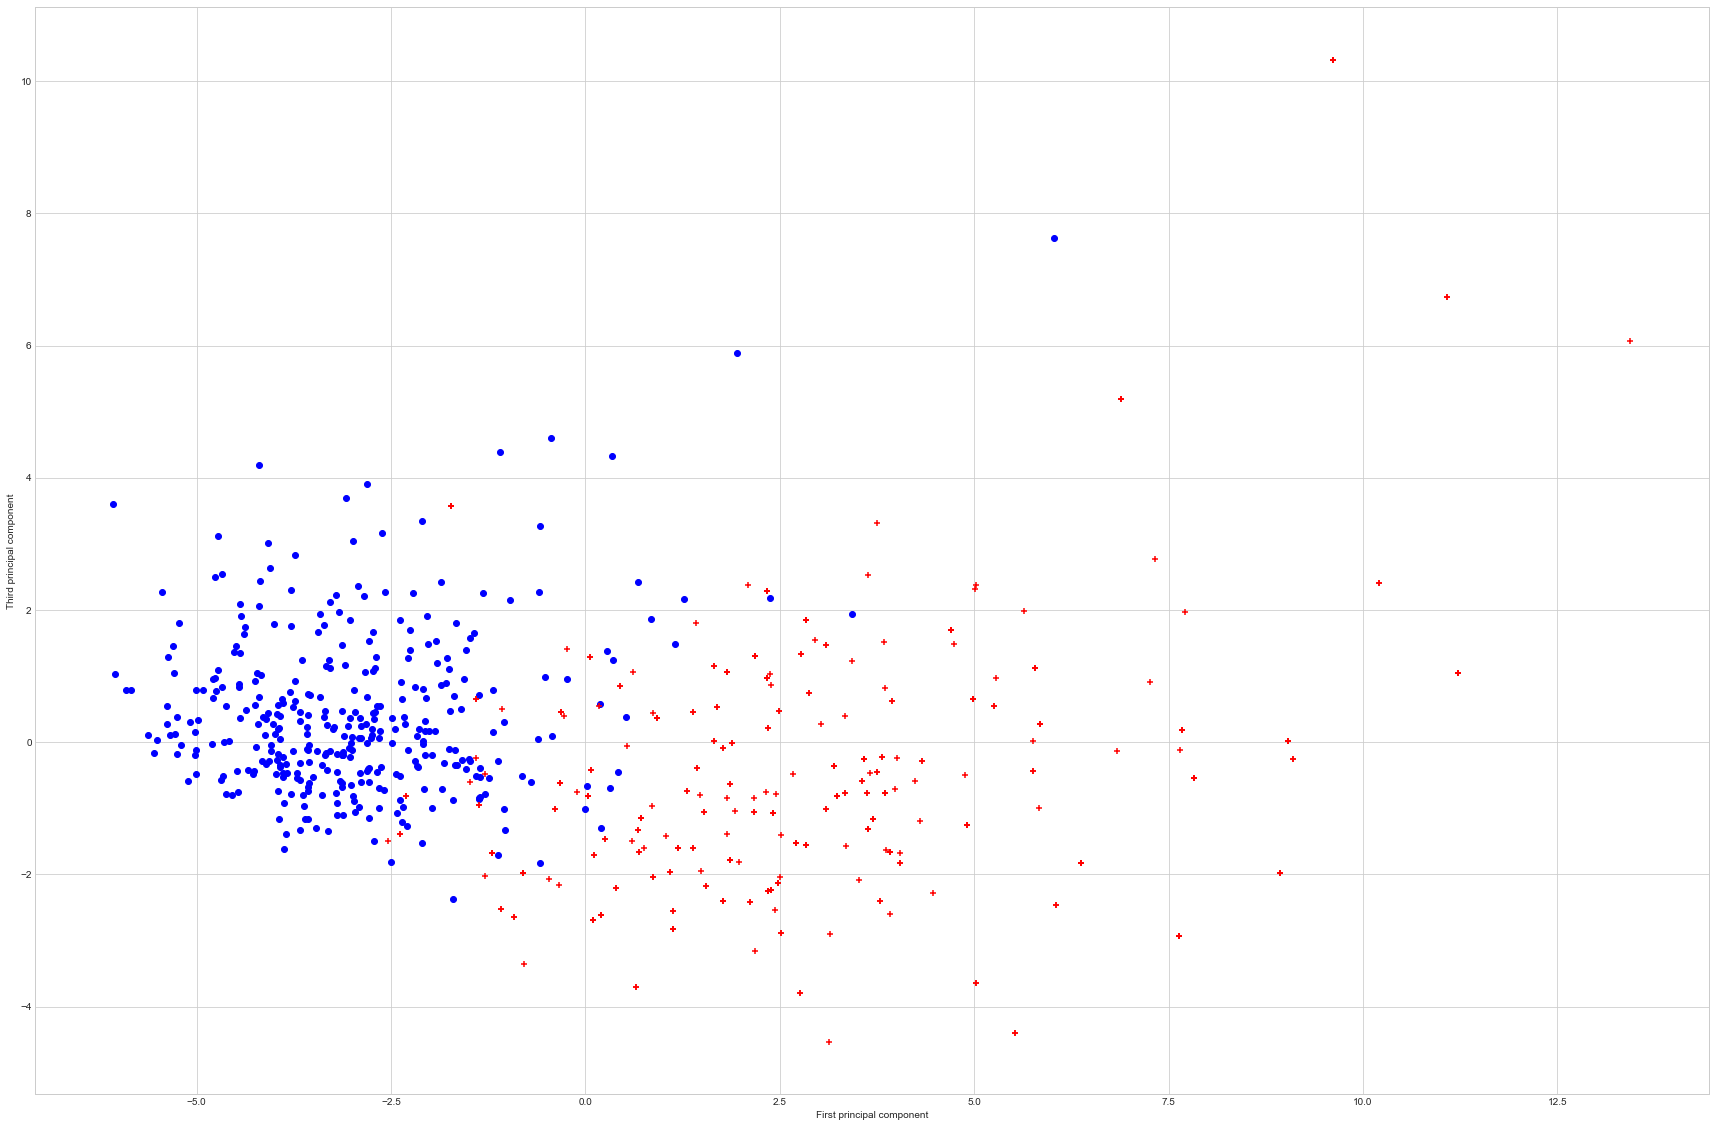

In [17]:
plt.figure(figsize=(30,20))
r = df.shape[0]

plt.xlabel("First principal component")
plt.ylabel("Third principal component")

for i in range(r):
    
    if df.iloc[i][0]:
        marker = '+'
        color='red'
        label='Malignant'
    else:
        marker = 'o'
        color='blue'
        label='Benign'
    
    plt.scatter(xPCA[i,0],xPCA[i,2], marker=marker , color=color, label=label)

## Face View

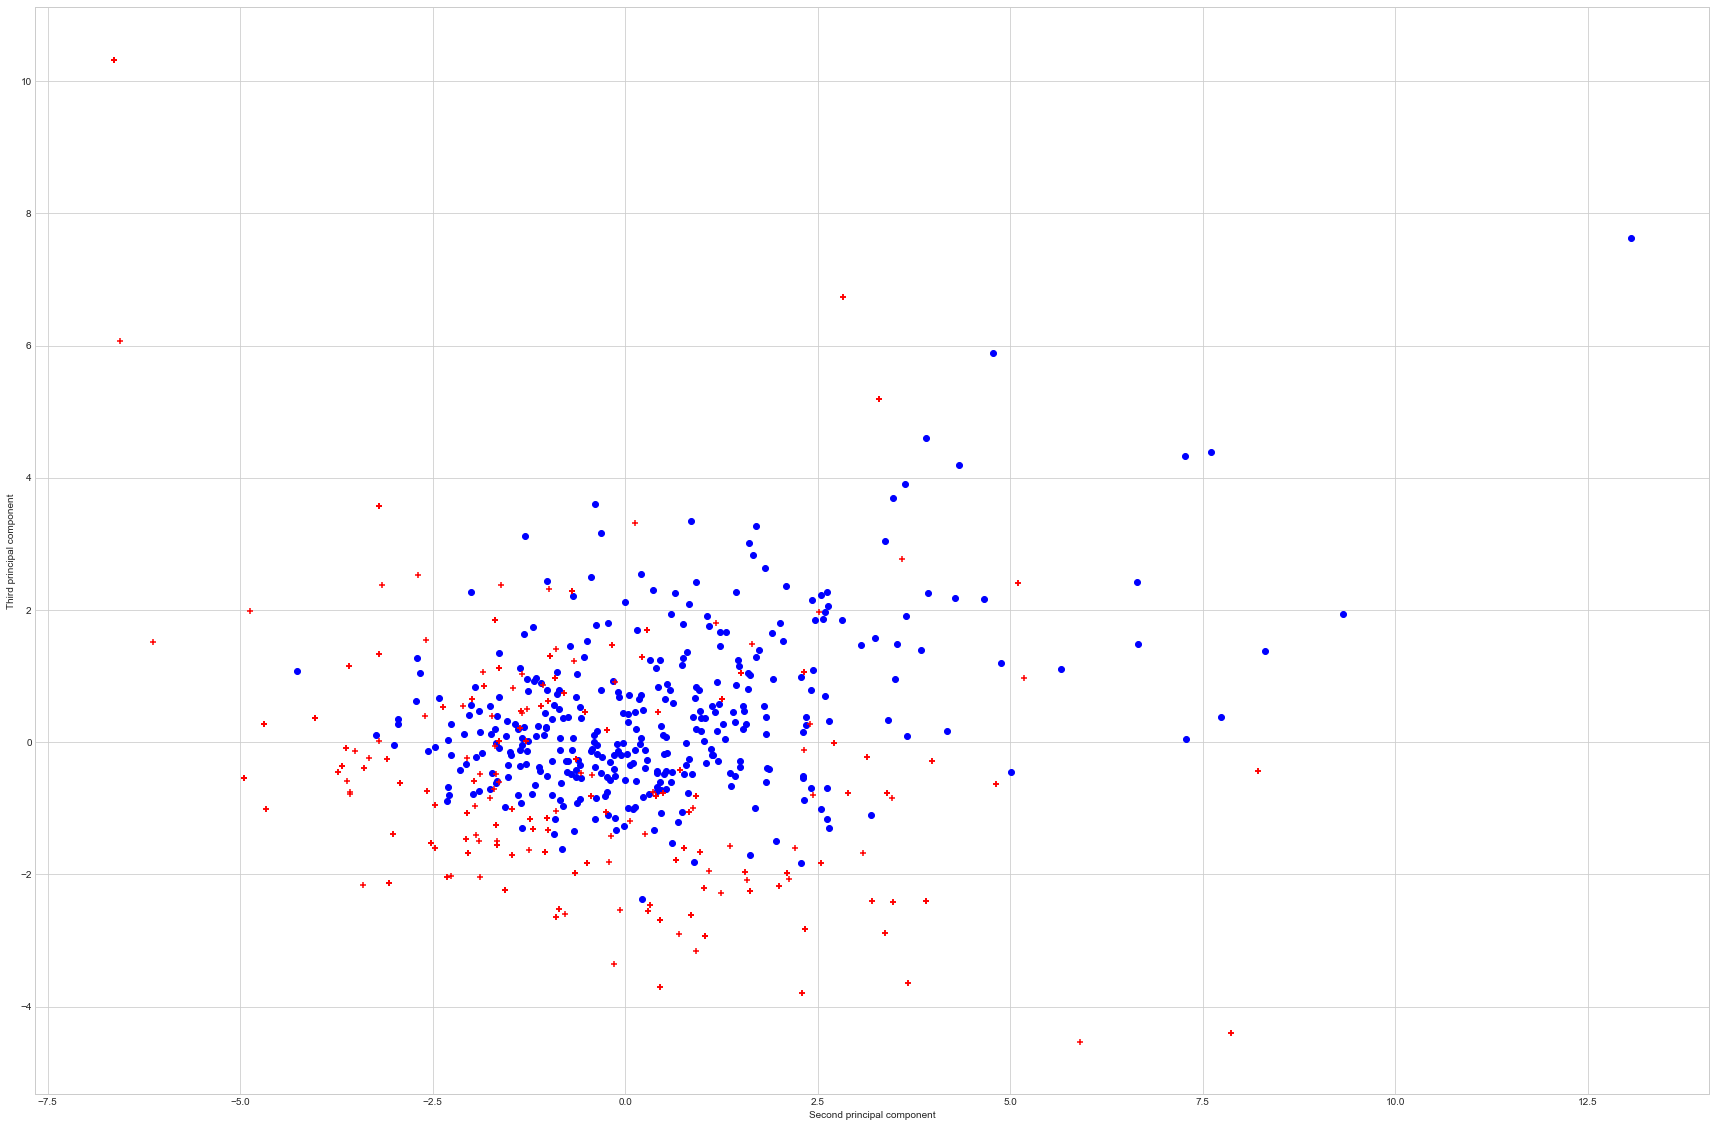

In [18]:
plt.figure(figsize=(30,20))
r = df.shape[0]

plt.xlabel("Second principal component")
plt.ylabel("Third principal component")

for i in range(r):
    
    if df.iloc[i][0]:
        marker = '+'
        color='red'
        label='Malignant'
    else:
        marker = 'o'
        color='blue'
        label='Benign'
    
    plt.scatter(xPCA[i,1],xPCA[i,2], marker=marker , color=color, label=label)

This cluster analysis helps provide insight into the potential regression model we could use. Eyballing the clusters shows a clear distinction between the two classses in the way they are clustered. Malignant instances tend to be more spread across X. This makes sense because histograms earlier shows that maligant features tend to be more spread out along the distribution. This proves that we can make a healthy seperation with the correct component features. A good idea will be to try and project where the original features hold the greatest weights of effect over this PCA clustster. This is called a biplot, effectivly a combination of Score Plot(as seen above) and a Loading Plot. This will help to see how the orginal features affect the clusters/data points and diagnosis. It will also provide a clear insight to what features are highly correlated.

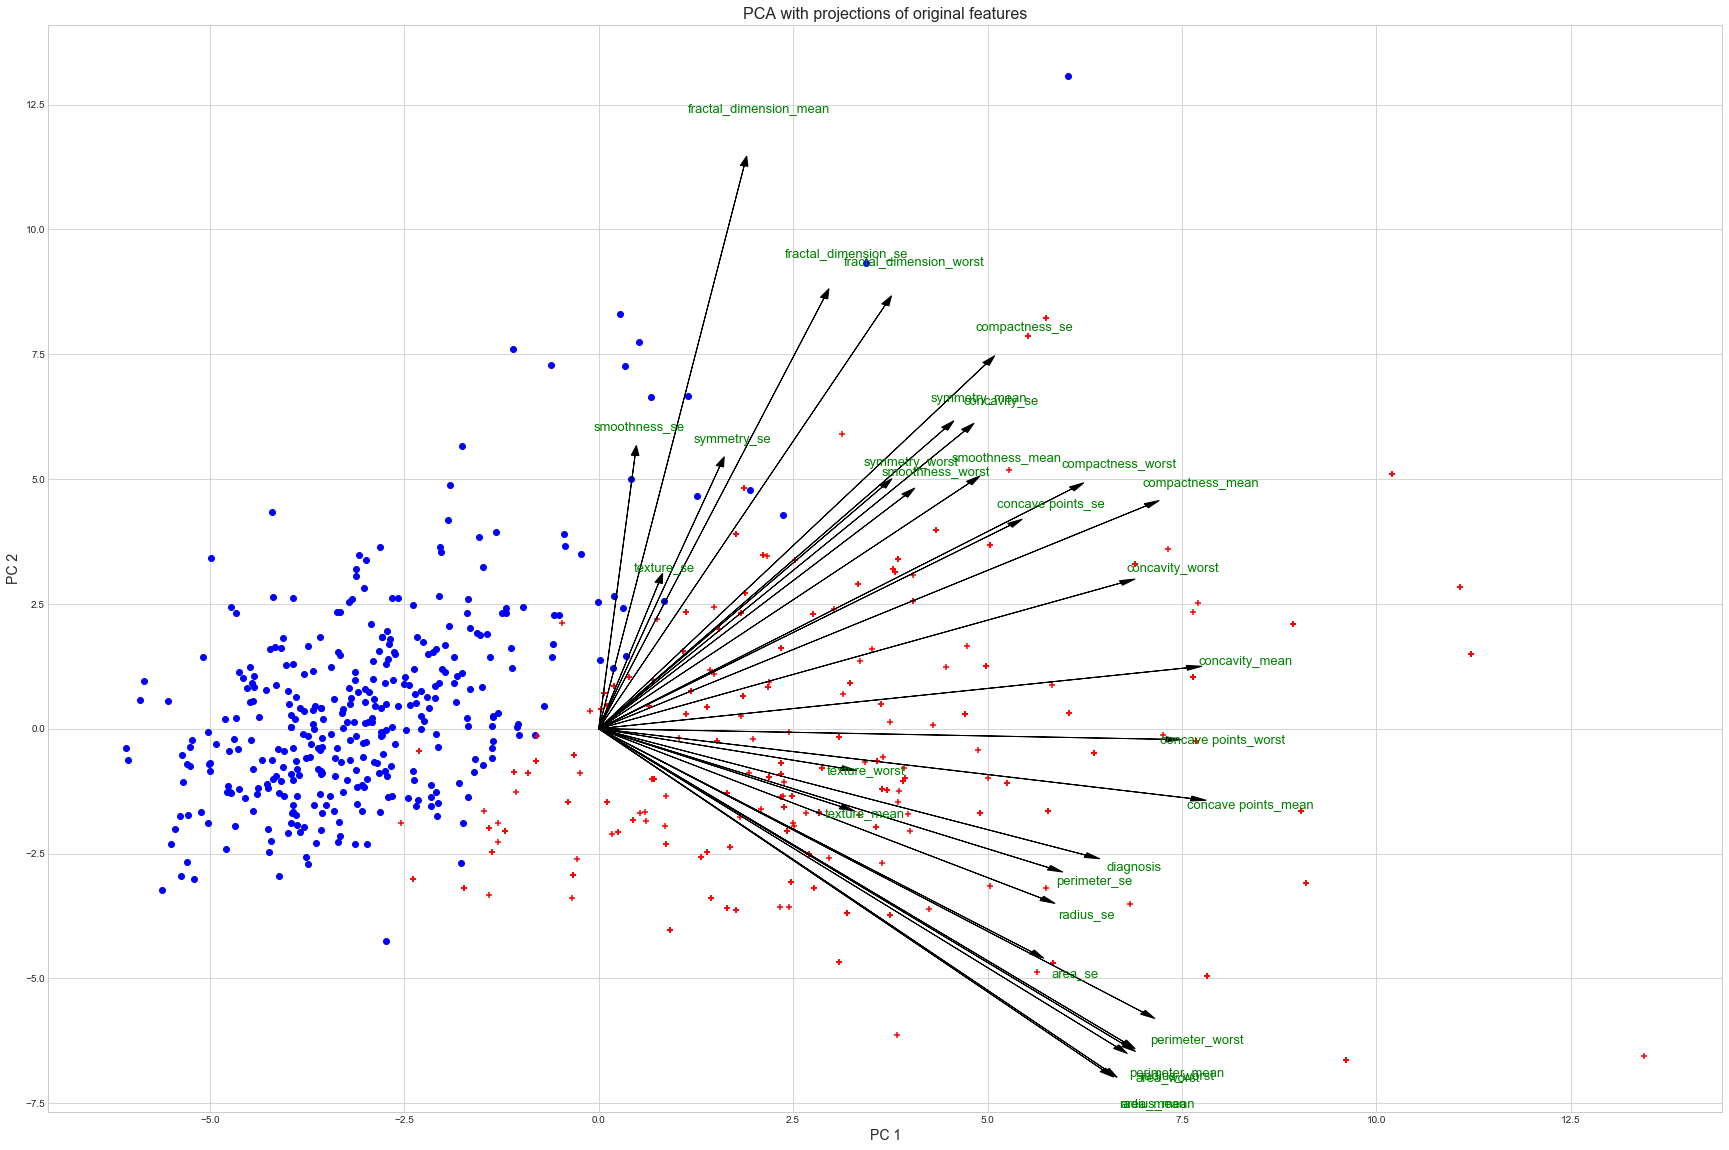

In [26]:
def biplot(data, pca):
    
    fig, ax = plt.subplots(figsize = (30,20))
    
    r = df.shape[0]

    for i in range(r):

        if df.iloc[i][0]:
            marker = '+'
            color='red'
            label='Malignant'
        else:
            marker = 'o'
            color='blue'
            label='Benign'

        ax.scatter(xPCA[i,0],xPCA[i,1], color=color, label=label, marker=marker)
    
    
    feature_vectors = pca.components_.T
    scale = 20.0
    arrow_size, text_pos = scale + 10.0, scale + 13.0

    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.1, head_length=0.2, linewidth=1, color='black')
        ax.text(v[0]*text_pos, v[1]*text_pos, df.columns[i], color='green', ha='center', va='center', fontsize=13)
        
    ax.set_xlabel("PC 1", fontsize=14)
    ax.set_ylabel("PC 2", fontsize=14)
    ax.set_title("PCA with projections of original features", fontsize=16);
    return ax

biplot(df, pca)

Now that the visuals have given better insights into the data, we can start feature selection.

We can distill from the biplot that the first princible component is the strongest indicator of malignancy being that majority of the red points are above the zero point along X. This means that loadings along the X axis are strong at predicting malignancy.

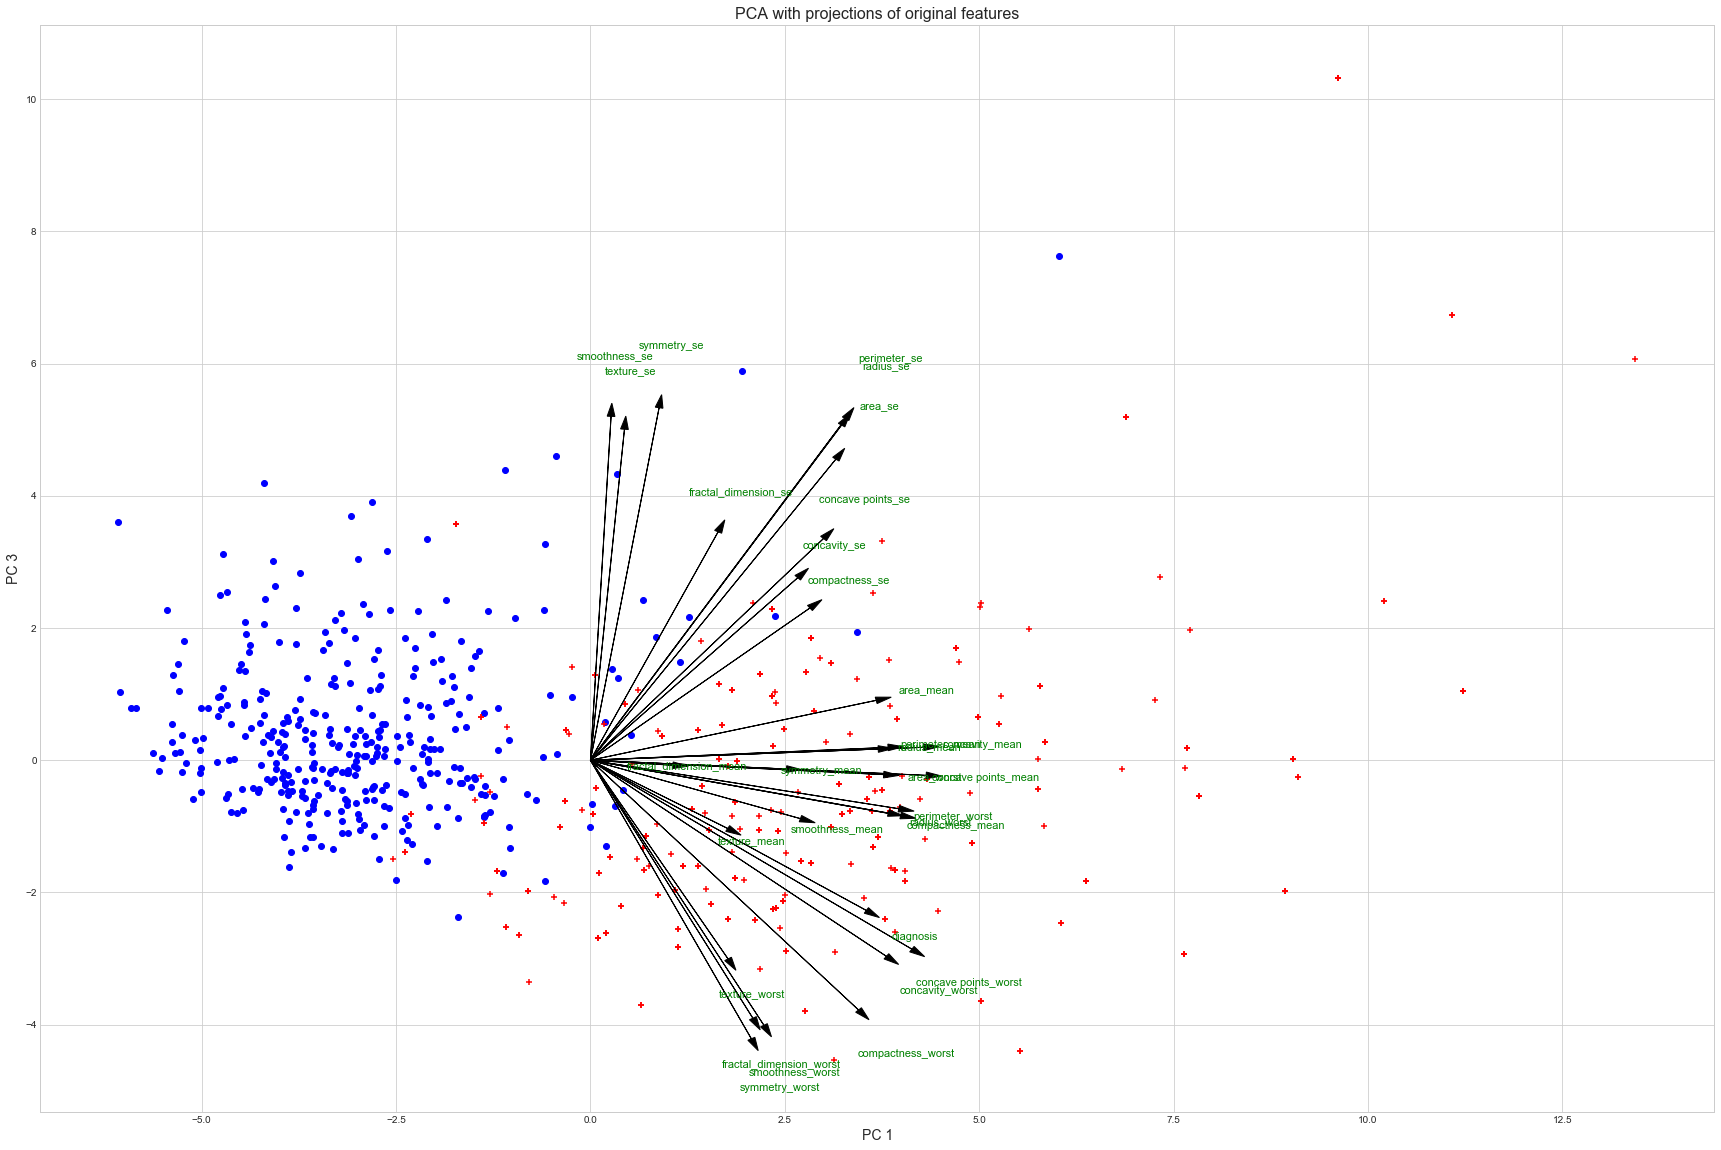

In [36]:
def biplot(data, pca):
    
    fig, ax = plt.subplots(figsize = (30,20))
    
    
    r = df.shape[0]

    for i in range(r):
    
        if df.iloc[i][0]:
            marker = '+'
            color='red'
            label='Malignant'
        else:
            marker = 'o'
            color='blue'
            label='Benign'

        plt.scatter(xPCA[i,0],xPCA[i,2], marker=marker , color=color, label=label)
    
    
    feature_vectors = pca.components_.T
    scale = 7.0
    arrow_size, text_pos = scale + 10.0, scale + 13.0

    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[2], head_width=0.1, head_length=0.2, linewidth=1, color='black')
        ax.text(v[0]*text_pos, v[2]*text_pos, df.columns[i], color='green', ha='center', va='center', fontsize=11)
        
    ax.set_xlabel("PC 1", fontsize=14)
    ax.set_ylabel("PC 3", fontsize=14)
    ax.set_title("PCA with projections of original features", fontsize=16);
    return ax

biplot(df, pca)

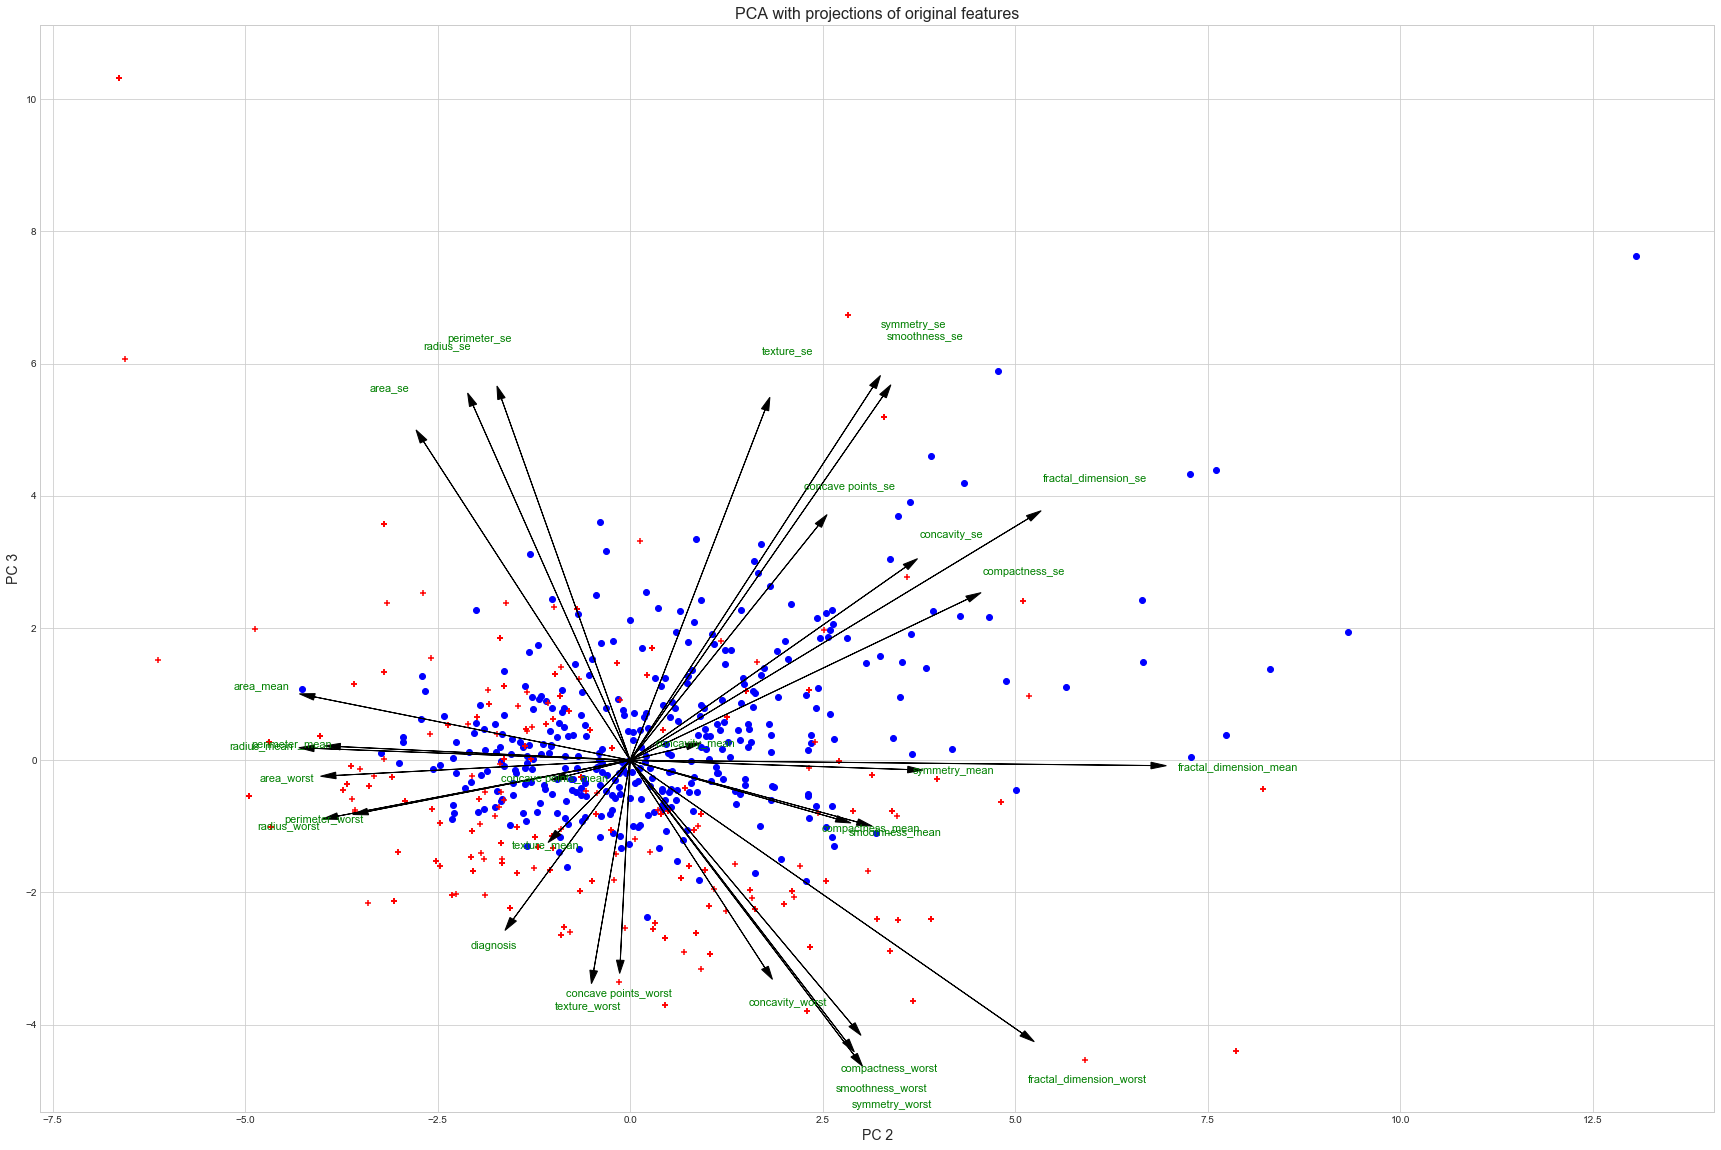

In [39]:
def biplot(data, pca):
    
    fig, ax = plt.subplots(figsize = (30,20))
    
    
    r = df.shape[0]

    for i in range(r):
    
        if df.iloc[i][0]:
            marker = '+'
            color='red'
            label='Malignant'
        else:
            marker = 'o'
            color='blue'
            label='Benign'

        plt.scatter(xPCA[i,1],xPCA[i,2], marker=marker , color=color, label=label)
    
    
    feature_vectors = pca.components_.T
    scale = 8.0
    arrow_size, text_pos = scale + 10.0, scale + 13.0

    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[1], arrow_size*v[2], head_width=0.1, head_length=0.2, linewidth=1, color='black')
        ax.text(v[1]*text_pos, v[2]*text_pos, df.columns[i], color='green', ha='center', va='center', fontsize=11)
        
    ax.set_xlabel("PC 2", fontsize=14)
    ax.set_ylabel("PC 3", fontsize=14)
    ax.set_title("PCA with projections of original features", fontsize=16);
    return ax

biplot(df, pca)

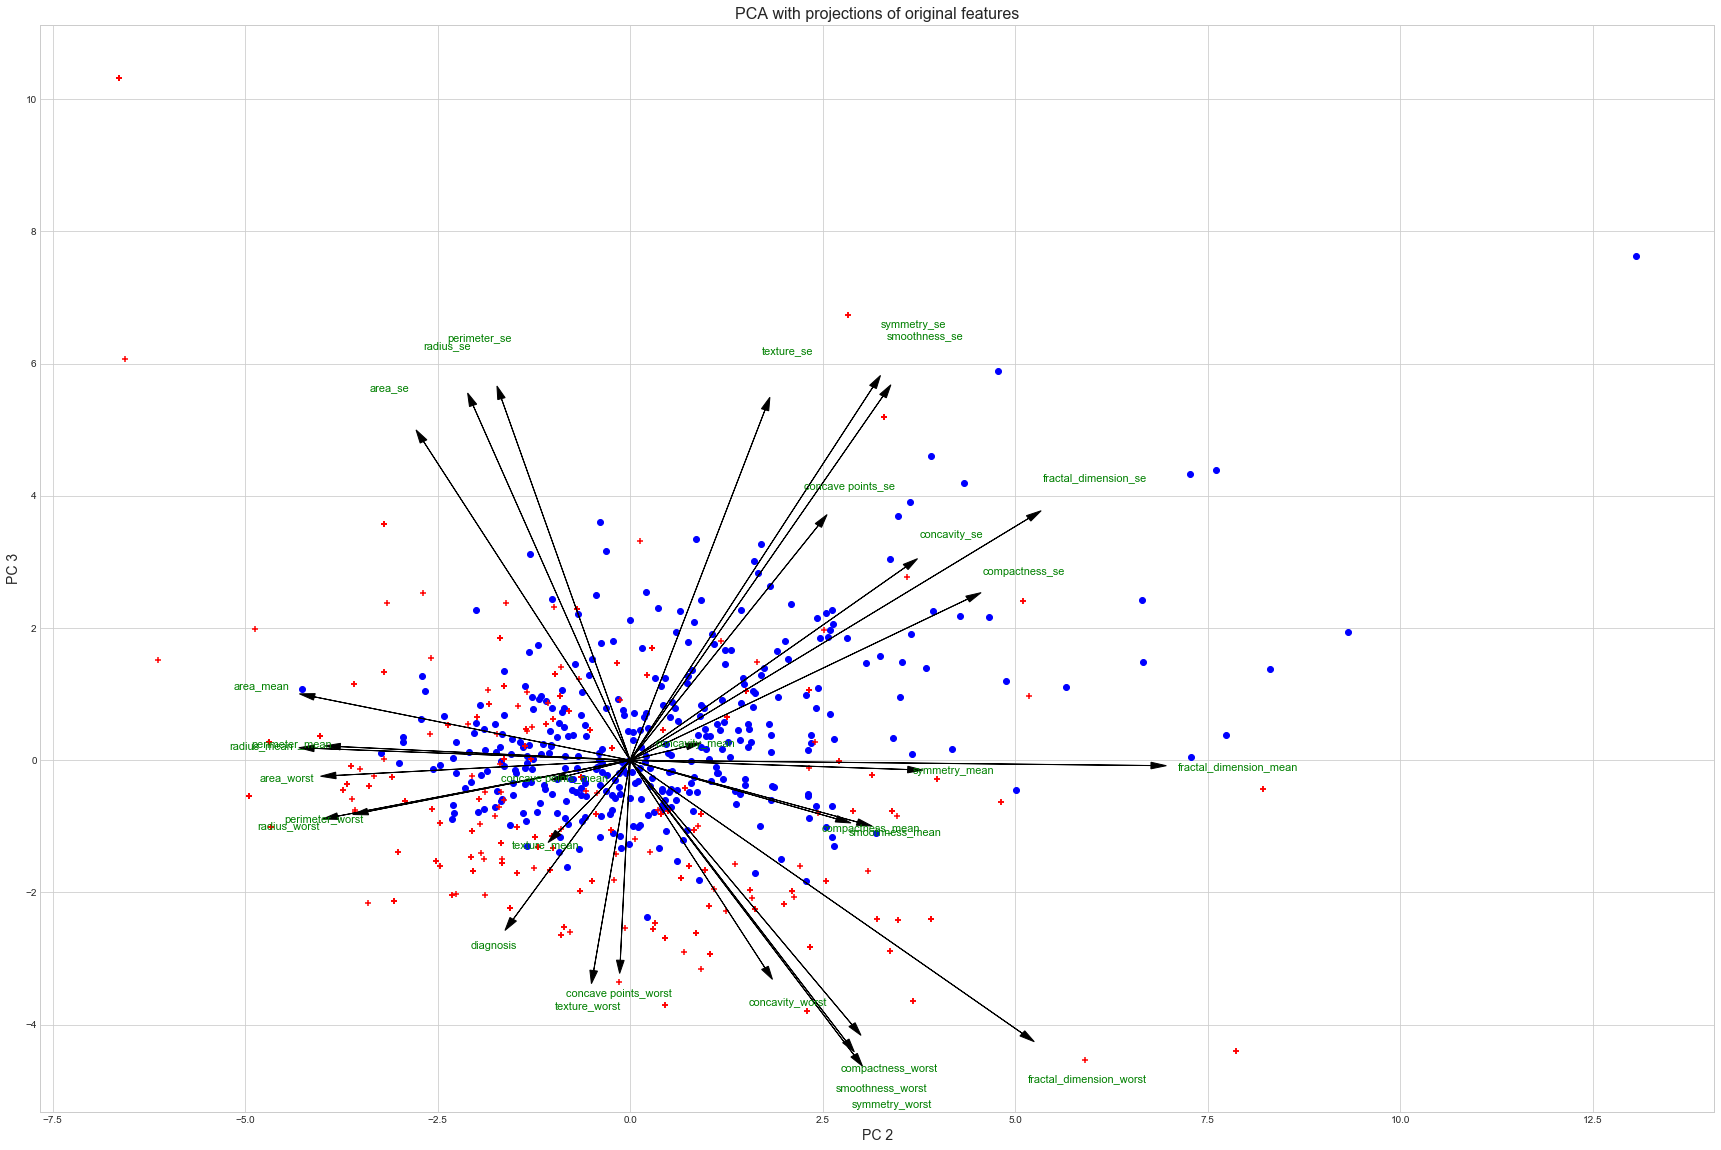

In [39]:
def biplot(data, pca):
    
    fig, ax = plt.subplots(figsize = (30,20))
    
    
    r = df.shape[0]

    for i in range(r):
    
        if df.iloc[i][0]:
            marker = '+'
            color='red'
            label='Malignant'
        else:
            marker = 'o'
            color='blue'
            label='Benign'

        plt.scatter(xPCA[i,1],xPCA[i,2], marker=marker , color=color, label=label)
    
    
    feature_vectors = pca.components_.T
    scale = 8.0
    arrow_size, text_pos = scale + 10.0, scale + 13.0

    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[1], arrow_size*v[2], head_width=0.1, head_length=0.2, linewidth=1, color='black')
        ax.text(v[1]*text_pos, v[2]*text_pos, df.columns[i], color='green', ha='center', va='center', fontsize=11)
        
    ax.set_xlabel("PC 2", fontsize=14)
    ax.set_ylabel("PC 3", fontsize=14)
    ax.set_title("PCA with projections of original features", fontsize=16);
    return ax

biplot(df, pca)

('accuracy', 0.96770788315326128)
('average_precision', 0.99228718272468264)
('recall', 0.96716666666666673)
('f1', 0.96714897263253119)
('roc_auc', 0.99486307692307707)


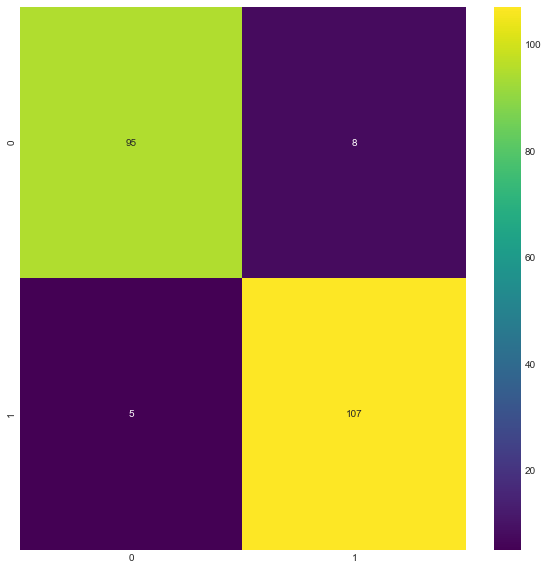

In [72]:
processingList = ['perimeter_se','radius_mean','concave points_worst','texture_mean']

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score


X = df.drop(['diagnosis'], axis=1)
Y = df['diagnosis'].values
X = X[processingList]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=7, test_size=0.3)

##Here is the model.
clf_rf_0 = RandomForestClassifier(random_state=7).fit(X_train,Y_train)

cm = confusion_matrix(Y_test, clf_rf_0.predict(X_test))

plt.figure(figsize=(10,10))

sb.heatmap(cm,annot=True,cmap='viridis',fmt='g')

kfold = StratifiedKFold(n_splits=10)

scoreType = ['accuracy','average_precision','recall','f1','roc_auc']
score = []

for metric in scoreType:
    score.append((metric,cross_val_score(clf_rf_0, X_train, Y_train, cv=kfold, scoring=metric).mean()))
    
for i in score:
    print(i)